# Credit Card Fraud Detection Project

### Abstract
Credit card fraud is a significant issue that effects consumers all around the world. In the U.S. alone, 60% credit card holders have been victimized by fraud, and 45% have experienced fraud multiple times. With a 2022 forecast indicating those losses will total ~$165.1 billion over the following 10 years, the issue isn't slowing down anytime soon. That's why it is important for effective credit card fraud detection systems to be set in place in order to prevent this issue.

## Introduction

Today we will be leveraging machine learning techniques to develop a credit card fraud detection model. More specifically, it will be a supervised classification machine learning project where the 'positives' are the fraud transactions. The dataset I will be using is the 'Credit Card' dataset from Kaggle.com, which contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced with the positive class (frauds) accounting for only 0.172% of all transactions. It also contains only numerical input variables which are the result of a PCA transformation. These features V1, V2, V3, ... V28 are the principal components obtained with PCA that have had their original labels removed for privacy reasons. The only features which have not been transformed with PCA are 'Time' and 'Amount'. The feature 'Time' contains the seconds elapsed between each transaction and the first transcaction in the dataset. Meanwhile, the feature 'Amount' is the transaction amount. Feature 'Class' is the response variable and it takes the value 1 in case of fraud and 0 otherwise. For this project, I'll start by loading in the dataset and performing some data cleaning to prepare it for exploration. In the EDA section, I'll examine the features availible and the most glaring issue with this dataset, it's imbalanceness. We'll then create a couple models and weight them on accuracy, precision, and recall.

In [1]:
#Loading necessary libraries
import pandas as pd #Data manipulation & analysis
import seaborn as sns #Data Viz
import matplotlib.pyplot as plt
seed = 33

In [2]:
#Reading in the dataset 
credit_data = pd.read_csv("creditcard.csv")
credit_data.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


## Data Cleaning & Exploratory Data Analysis
>In the this section we'll be preparing our data for modelling by handling null values, dropping duplicate entries, and removing features deemed unnecessary.

In [3]:
print(credit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> Examining the dataset further, notice the 'Time' column feature. Knowing that this feature simply represents the number of seconds that has elapsed between the that rows transaction and the very first transaction made that month, we can safely say that this is unnessesary for our models and may actual hurt it through overfitting. I'll thus drop this feature from the dataset before moving forward to evaluate missing and duplicate values

In [4]:
#Check for duplicate values
print('Duplicate Entries:', credit_data.duplicated().sum())

#With 1081 duplicate entries, we'll drop all of them
credit_data = credit_data.drop_duplicates()

#Dropping Feature "Time"
credit_data = credit_data.drop(columns = ['Time'])

Duplicate Entries: 1081


In [5]:
credit_data.shape

(283726, 30)

> Remember that the data is highly **imbalanced** which will lead to a couple of issues once we start using classifications models to detect credit card fraud. The first issue is that the model will have significant bias towards the majority class, which in this case is non-fraudulent purchases, and often overlook the fraud cases that it's trying to detect. The second issue is that performance metrics will be very misleading. For example, if the model predicted 100% of the cases to be non-fraudulent, it would achieve an accuracy of around 99% despite failing to detect any bad purchases. That's why different performance metrics will be considered as well (precision & recall) when evaluating our models, as well as possible solutions which I will expand upon below.

Text(0.5, 1.0, 'Credit Data Imbalance Distribution')

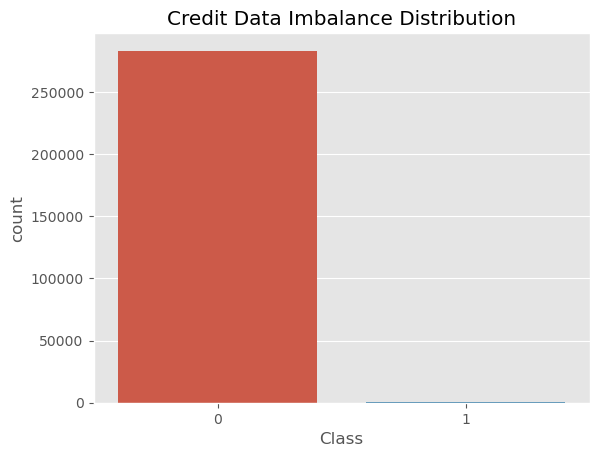

In [6]:
plt.style.use('ggplot')
sns.countplot(x='Class', data=credit_data) 
plt.title('Credit Data Imbalance Distribution')

## Predictive Modeling


> Now we'll get into choosing classification models to detect fraudulent purchases:
> - **Logistic Regression**: the model is simple, interpretable, fast and well suited for a binary classification problems like the one we are working with.
> - **Decision Tree**: the model is fast, intuitive and can capture non-linear relationships though it may be subject to overfitting.
> - **Random Forest**: the ensemble method that random forest models employ assist in achieving a high accuracy and is resistent to noise and outliers, however it takes far more time and memory to make its predictions.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [8]:
#Prep Train/Test data
y = credit_data['Class']
x = credit_data.drop('Class', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=3)

In [9]:
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 226980
Test set size: 56746


In [10]:
#Training Models & Running Predictions
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=5, max_iter = 500),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=5),
    "Random Forest Classifier": RandomForestClassifier(random_state=5)
}

for name, clf in classifiers.items():
    print(f"\n ==={name}===")
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_predict)}")
    print(f"\n Precision: {precision_score(y_test, y_predict)}")
    print(f"\n Recall: {recall_score(y_test, y_predict)}")


 ===Logistic Regression===


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9992246149508336

 Precision: 0.8387096774193549

 Recall: 0.6046511627906976

 ===Decision Tree Classifier===

 Accuracy: 0.9991541254009093

 Precision: 0.69

 Recall: 0.8023255813953488

 ===Random Forest Classifier===

 Accuracy: 0.9995241955380115

 Precision: 0.9154929577464789

 Recall: 0.7558139534883721


### Initial Evaluation of Models

> After training the model and running predictions there many notable details in the results depicted above. First, we'll start with the accuracy score which were all ~99%. This is misleading for the reason I mentioned earlier that even without a model, if someone had predicted 100% of the purchases to be non-fraudulent, they'd achieve the same high accuracy due to the imbalanced nature of the datas
et. This could be a costly mistake for credit card companies and their constituents. So metrics that will be more important for this case will be precision and recall, whose definition I will all define below:
> - Accuracy: measures the overall correctness of the model, it is the ratio of correctly predicted instances to the total instances
> - Precison: measures the correctness of positive predictions, it is the ratio of correctly predicted positive instances to the total predicted positive instances (Note that positive instances in this case indicate a fraudulent purchase)
> - Recall: measures the ability of the model to find all the relevant positive instacnes, it is the ratio of correctly predicted instances to the total actual positive instances
>
> Given these definitions, we would thus want an especially high recall as false negatives (flagging a purchase as real when it is actually fraudulent) will be extremely costly. While precision is also important, getting a false positive in this situation is far less harmful. So let's take a look at the models and see how well they performed in these areas. The Logistic Regression model achieved a solid score for precision (83.8%) but had a lackluster recall score (60.4%). Meanwhile, the Decision Tree model had a lower precision score of (69%) but a higher recall (80.2%). Finally, the Random Forest classifier achieved the highest precision score (91.5%) as well as the highest recall (75.5%), though it took the longest time to process the dataset. Before I go about raising these metrics and handling the glaring imbalance problem, I'm going to backtrack to our feature(s), more specifically the 'Amount' feature within our credit_data. 

#### Scaling & Standardization

> The 'Amount' column within our data set has yet to be scaled and standardized relative to the rest of the features. The larger ranges and values may affect the model's performance. By scaling the values within the 'Amount' column we may see minor improvements in models that use gradient descent, like logistic regression. We'll perform the following below and rerun our regression model to see if anything changes.


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
credit_data['Amount'] = sc.fit_transform(pd.DataFrame(credit_data['Amount']))
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [13]:
#Prep Train/Test new data
y = credit_data['Class']
x = credit_data.drop('Class', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=3)

Log_Reg = LogisticRegression()
Log_fit = Log_Reg.fit(x_train,y_train)
Log_predict = Log_fit.predict(x_test)
                            
print(f"\n ===Logistic Regression===")
print(f"\n Accuracy: {accuracy_score(y_test, Log_predict)}")
print(f"\n Precision: {precision_score(y_test, Log_predict)}")
print(f"\n Recall: {recall_score(y_test, Log_predict)}")


 ===Logistic Regression===

 Accuracy: 0.9992246149508336

 Precision: 0.8387096774193549

 Recall: 0.6046511627906976


#### Handling Data Imbalance: Under & Over-sampling
> It seems scaling the transaction amount did not impact the model's performance so we'll move onto dealing with the data imbalance more directly. To remedy this issue I'll be employing the use of **under-sampling** as well as **over-sampling** on our dataset and evaluating the model performance afterwards. In under-sampling, the number of instances for the majority class is reduced to match the number of instances in the minority class (fraud purchases). This will hopefully allow the models to recognize minority classes better though some information on the majority class is lost. Over-sampling on the other hand, will enlarge the frequency of fraudulent purchases to match authentic ones. While this will likely improve our models as well, longer training times are to be expected due to the sheer volume of data that will be present.

In [19]:
real = credit_data[credit_data['Class'] == 0]
fraud = credit_data[credit_data['Class'] == 1]
fraud.shape

(473, 30)

In [20]:
real_sample = real.sample(n=473)

In [21]:
under_sample_data = pd.concat([real_sample,fraud], 
                              ignore_index = True)
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.488016,0.085694,-0.203092,1.139769,1.693764,-0.984222,1.652730,-2.031623,0.825875,1.955998,...,0.265636,0.629624,0.657085,-0.005730,0.232360,-0.480947,-0.665304,-0.783282,13.31,0
1,1.116222,-0.894885,-0.150620,-0.444591,-1.061179,-1.202285,0.006002,-0.342814,-0.966557,0.653265,...,-0.358217,-0.934289,-0.079090,0.407999,0.236777,0.996149,-0.109909,0.026821,163.64,0
2,1.393508,-0.496592,0.319095,-0.870694,-0.832164,-0.556248,-0.604828,-0.038255,-1.022695,0.799577,...,-0.022282,-0.230530,0.031546,-0.063932,0.323685,-0.412141,-0.001658,0.005487,11.21,0
3,-0.089780,1.338690,-0.172202,0.726921,1.409766,-0.276836,1.775034,-0.577840,-0.565854,0.275728,...,0.037301,0.642846,-0.429344,-0.726931,0.127219,-0.372357,0.158846,0.005407,28.25,0
4,1.304473,-0.490863,0.779575,-0.505592,-1.168957,-0.796715,-0.751515,-0.109070,0.335377,0.416607,...,-0.173726,-0.501863,0.146498,0.443352,0.117636,-0.550645,-0.029256,0.011062,33.49,0


Text(0.5, 1.0, 'Credit Data Distribution (Under-Sampling)')

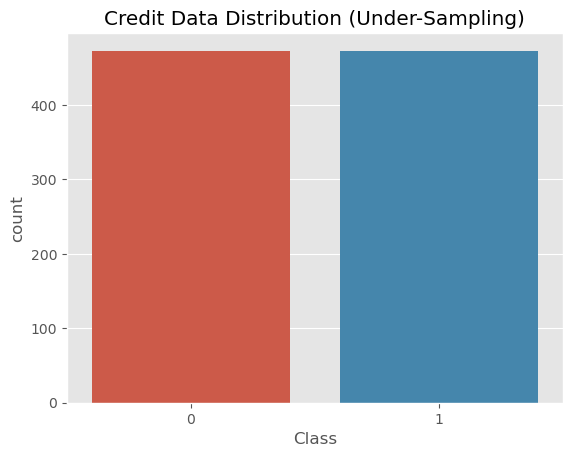

In [22]:
plt.style.use('ggplot')
sns.countplot(x='Class', data=under_sample_data) 
plt.title('Credit Data Distribution (Under-Sampling)')

In [23]:
#Prep Train/Test data
y_u = under_sample_data['Class']
x_u = under_sample_data.drop('Class', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_u, y_u, test_size=.2, random_state=3)

In [19]:
#Training Models & Running Predictions (Under-Sample)
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=5, max_iter = 500),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=5),
    "Random Forest Classifier": RandomForestClassifier(random_state=5)
}

for name, clf in classifiers.items():
    print(f"\n ==={name}===")
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_predict)}")
    print(f"\n Precision: {precision_score(y_test, y_predict)}")
    print(f"\n Recall: {recall_score(y_test, y_predict)}")


 ===Logistic Regression===

 Accuracy: 0.9526315789473684

 Precision: 0.9876543209876543

 Recall: 0.9090909090909091

 ===Decision Tree Classifier===

 Accuracy: 0.9263157894736842

 Precision: 0.9111111111111111

 Recall: 0.9318181818181818

 ===Random Forest Classifier===

 Accuracy: 0.9421052631578948

 Precision: 0.9529411764705882

 Recall: 0.9204545454545454


In [10]:
from imblearn.over_sampling import SMOTE
x_over, y_over= SMOTE().fit_resample(x, y)

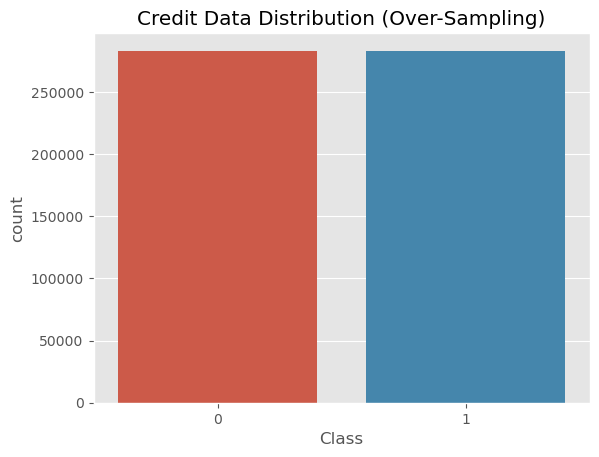

In [12]:
over_sample_data = y_over.to_frame()
over_sample_data = over_sample_data.rename(columns={over_sample_data.columns[0]: 'Class'})

plt.style.use('ggplot')
sns.countplot(x='Class',data=over_sample_data)
plt.title('Credit Data Distribution (Over-Sampling)')
plt.show()

In [26]:
#Prep Train/Test data
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.2, random_state=3)

In [27]:
#Training Models & Running Predictions (Over-Sample)
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=5, max_iter = 500),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=5),
    "Random Forest Classifier": RandomForestClassifier(random_state=5)
}

for name, clf in classifiers.items():
    print(f"\n ==={name}===")
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_predict)}")
    print(f"\n Precision: {precision_score(y_test, y_predict)}")
    print(f"\n Recall: {recall_score(y_test, y_predict)}")


 ===Logistic Regression===


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9579883850240949

 Precision: 0.980488435198346

 Recall: 0.934828138474806

 ===Decision Tree Classifier===

 Accuracy: 0.9981377204285891

 Precision: 0.9974515800203874

 Recall: 0.9988384167267992

 ===Random Forest Classifier===

 Accuracy: 0.9998676104570087

 Precision: 0.999736073477144

 Recall: 1.0


### Final Model Evaluation 
> After running fitting and training all three models on both the undersampled and oversampled dataset, we see drastic improvements in our evaluation scores (most notably within precision & recall). In our undersampled dataset we see improvements within all 3 models as they were able to break 90% in all evaluation metrics. While the accuracy score dipped slightly around 5% across each model, this may mostly be due to an increased false positive rate which in this case is far less of an issue. Moving onto our oversampled dataset is where the highest evaluation scores were found with all 3 metrics being above 99.9% when using the Random Forest Classifier. Other models found similar success with the Logistic Regression and Decision Tree models posting recall scores of 93.4% and 99.8% respectively. This is most likely due to the fact that the models have far more information and data to train themselves on and were able to far more accurately predict fraudulent and real purchases. Below I'll extract our model, using the Decision Tree Classification model. My reasoning for using this model over the Random Forest is it's practicality when handling large datasets as it is a much faster model. Given the context of the situation, detecting fraud in a timely (and accurate) manner and notifying customers early is key to my model's success.

In [38]:
#Extracting RandomForest Model
import joblib 
dtc = DecisionTreeClassifier()
dtc.fit(x_over, y_over)
joblib.dump(dtc, "fraud_detection_model.pkl")
detection_model = joblib.load("fraud_detection_model.pkl")

### Conclusions
As I extract my machine learning model, let's review some key concepts I learned from this project:
  - **Appropriate Evaluation Metrics:** Accuracy isn't everything, and evaluating the efficacy of a model on a single metric alone can be extremely misleading and at times harmful. Especially given the context of the data and problem that I am working with today, a high accuracy score can be achieved through random guessing but would mean nothing when fraudulent purchases are not identified. Hence, why I used both Precision and Recall scores as better metrics with which to evaluate the model. Another evaluation metric I could've used for this classification problem include F1-score
  - **Handling Unbalanced Data:** The dataset I was working with was extremely unbalanced and this posed issues such as the one I just mentioned regarding accuracy, as well as hurting the ability of the machine-learning models to identify and flag fraudulent purchases. Learning how to both under and oversample the data in order to balance it was key in achieving high scores in the appropriate evaluation metrics.
  - **Machine Learning Models Use Cases:** Each and every machine learning model has use cases in which it is far more appropriate to use. I selected the following machine learning models due to their fast training speeds, but varying type and resource needs (Linear/Non-Linear Model & Small/Large Memory footprint)

### Acknowledgements
Credit Card data courtesy of ***Machine Learning Group*** and can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)